In [2]:
!pip install -q keras

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from keras.datasets import mnist
from keras.models import Sequential
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam ,RMSprop
from keras.layers import Conv2D, MaxPooling2D
from keras.utils.np_utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Dropout, Lambda, Flatten, Activation, Dropout

%matplotlib inline
np.random.seed(1337)

Using TensorFlow backend.


In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train.shape
x_train = x_train.reshape(x_train.shape[0], 784).astype('float32')
x_test = x_test.reshape(x_test.shape[0], 784).astype('float32')
x_train /= 255
x_test /= 255

11493376/11490434 [==============================] - 1s 0us/step


In [0]:
number_of_classes = 10
y_train.shape
y_train = to_categorical(y_train,number_of_classes)
y_test = to_categorical(y_test,number_of_classes)

In [0]:
y_test.shape
#model
model = Sequential()
model.add(Dense(784, input_shape = (784,)))
model.add(Activation('relu'))

model.add(Dense(64))
model.add(Activation('relu'))

model.add(Dense(10))
model.add(Activation('softmax'))

model.compile(optimizer = 'adagrad', loss='categorical_crossentropy', metrics=['accuracy'])

In [6]:
classifier = model.fit(x_train, y_train, batch_size = 32, epochs = 10, verbose = True, validation_data = (x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 16s 269us/step - loss: 0.2363 - acc: 0.9322 - val_loss: 0.1321 - val_acc: 0.9614
Epoch 2/10
43776/60000 [====================>.........] - ETA: 4s - loss: 0.1129 - acc: 0.9677

60000/60000 [==============================] - 16s 261us/step - loss: 0.1078 - acc: 0.9692 - val_loss: 0.0990 - val_acc: 0.9703
Epoch 3/10
60000/60000 [==============================] - 15s 256us/step - loss: 0.0789 - acc: 0.9771 - val_loss: 0.0863 - val_acc: 0.9733
Epoch 4/10
18720/60000 [========>.....................] - ETA: 10s - loss: 0.0636 - acc: 0.9820

60000/60000 [==============================] - 16s 259us/step - loss: 0.0624 - acc: 0.9820 - val_loss: 0.0854 - val_acc: 0.9729
Epoch 5/10
60000/60000 [==============================] - 16s 260us/step - loss: 0.0511 - acc: 0.9859 - val_loss: 0.0716 - val_acc: 0.9787
Epoch 6/10
12384/60000 [=====>........................] - ETA: 12s - loss: 0.0396 - acc: 0.9901

60000/60000 [==============================] - 15s 257us/step - loss: 0.0430 - acc: 0.9882 - val_loss: 0.0687 - val_acc: 0.9790
Epoch 7/10
60000/60000 [==============================] - 16s 259us/step - loss: 0.0365 - acc: 0.9902 - val_loss: 0.0641 - val_acc: 0.9803
Epoch 8/10
11840/60000 [====>.........................] - ETA: 11s - loss: 0.0289 - acc: 0.9938

60000/60000 [==============================] - 16s 258us/step - loss: 0.0312 - acc: 0.9920 - val_loss: 0.0623 - val_acc: 0.9812
Epoch 9/10
60000/60000 [==============================] - 15s 256us/step - loss: 0.0273 - acc: 0.9934 - val_loss: 0.0615 - val_acc: 0.9803
Epoch 10/10
10976/60000 [====>.........................] - ETA: 12s - loss: 0.0206 - acc: 0.9961

60000/60000 [==============================] - 15s 256us/step - loss: 0.0238 - acc: 0.9947 - val_loss: 0.0609 - val_acc: 0.9814


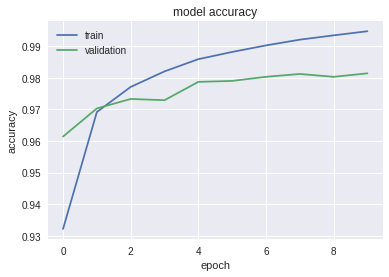

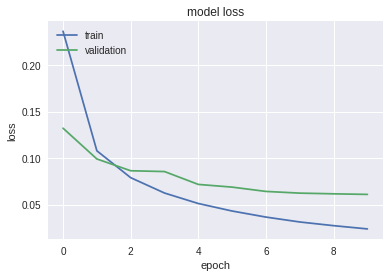

Test loss: 0.06087730827848427
Test accuracy: 0.9814


In [9]:
plt.plot(classifier.history['acc'])
plt.plot(classifier.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


plt.plot(classifier.history['loss'])
plt.plot(classifier.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])